# Part 1: Stitching pairs of images

In [1]:
# imports
import numpy as np
import skimage
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance
import scipy 

In [85]:
# Provided code - nothing to change here

"""
Harris Corner Detector
Usage: Call the function harris(filename) for corner detection
Reference   (Code adapted from):
             http://www.kaij.org/blog/?p=89
             Kai Jiang - Harris Corner Detector in Python
             
"""
from pylab import *
from scipy import signal
from scipy import *
import numpy as np
from PIL import Image

def harris(filename, min_distance = 10, threshold = 0.1):
    """
    filename: Path of image file
    threshold: (optional)Threshold for corner detection
    min_distance : (optional)Minimum number of pixels separating 
     corners and image boundary
    """
    im = np.array(Image.open(filename).convert("L"))
    harrisim = compute_harris_response(im)
    filtered_coords = get_harris_points(harrisim,min_distance, threshold)
    plot_harris_points(im, filtered_coords)

def gauss_derivative_kernels(size, sizey=None):
    """ returns x and y derivatives of a 2D 
        gauss kernel array for convolutions """
    size = int(size)
    if not sizey:
        sizey = size
    else:
        sizey = int(sizey)
    y, x = mgrid[-size:size+1, -sizey:sizey+1]
    #x and y derivatives of a 2D gaussian with standard dev half of size
    # (ignore scale factor)
    gx = - x * np.exp(-(x**2/float((0.5*size)**2)+y**2/float((0.5*sizey)**2))) 
    gy = - y * np.exp(-(x**2/float((0.5*size)**2)+y**2/float((0.5*sizey)**2))) 
    return gx,gy

def gauss_kernel(size, sizey = None):
    """ Returns a normalized 2D gauss kernel array for convolutions """
    size = int(size)
    if not sizey:
        sizey = size
    else:
        sizey = int(sizey)
    x, y = mgrid[-size:size+1, -sizey:sizey+1]
    g = np.exp(-(x**2/float(size)+y**2/float(sizey)))
    return g / g.sum()

def compute_harris_response(im):
    """ compute the Harris corner detector response function 
        for each pixel in the image"""
    #derivatives
    gx,gy = gauss_derivative_kernels(3)
    imx = signal.convolve(im,gx, mode='same')
    imy = signal.convolve(im,gy, mode='same')
    #kernel for blurring
    gauss = gauss_kernel(3)
    #compute components of the structure tensor
    Wxx = signal.convolve(imx*imx,gauss, mode='same')
    Wxy = signal.convolve(imx*imy,gauss, mode='same')
    Wyy = signal.convolve(imy*imy,gauss, mode='same')   
    #determinant and trace
    Wdet = Wxx*Wyy - Wxy**2
    Wtr = Wxx + Wyy   
    return Wdet / Wtr

def get_harris_points(harrisim, min_distance=10, threshold=0.1):
    """ return corners from a Harris response image
        min_distance is the minimum nbr of pixels separating 
        corners and image boundary"""
    #find top corner candidates above a threshold
    corner_threshold = max(harrisim.ravel()) * threshold
    harrisim_t = (harrisim > corner_threshold) * 1    
    #get coordinates of candidates
    candidates = harrisim_t.nonzero()
    coords = [ (candidates[0][c],candidates[1][c]) for c in range(len(candidates[0]))]
    #...and their values
    candidate_values = [harrisim[c[0]][c[1]] for c in coords]    
    #sort candidates
    index = np.argsort(candidate_values)   
    #store allowed point locations in array
    allowed_locations = np.zeros(harrisim.shape)
    allowed_locations[min_distance:-min_distance,min_distance:-min_distance] = 1   
    #select the best points taking min_distance into account
    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i][0]][coords[i][1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i][0]-min_distance):(coords[i][0]+min_distance),
                (coords[i][1]-min_distance):(coords[i][1]+min_distance)] = 0               
    return filtered_coords

def plot_harris_points(image, filtered_coords):
    """ plots corners found in image"""
    figure()
    gray()
    imshow(image)
    plot([p[1] for p in filtered_coords],[p[0] for p in filtered_coords],'r*')
    axis('off')
    show()


/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in true_divide
/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:86: DeprecationWarning: scipy.argsort is deprecated and will be removed in SciPy 2.0.0, use numpy.argsort instead
/Users/zongfan/opt/miniconda3/envs/pytorc

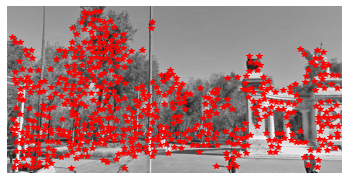

In [3]:
# Usage: 
img_name = 'part1_left.jpeg'
image = np.asarray(Image.open(img_name).convert("L"))
harrisim = compute_harris_response(image)
filtered_coords = get_harris_points(harrisim, min_distance=10, threshold=0.1)
# print(np.array(filtered_coords).shape, filtered_coords)
plot_harris_points(image, filtered_coords)

/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:86: DeprecationWarning: scipy.argsort is deprecated and will be removed in SciPy 2.0.0, use numpy.argsort instead
/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:88: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros i

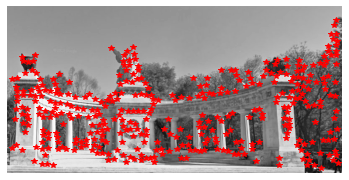

In [4]:
img_name = 'part1_right.jpeg'
image = np.asarray(Image.open(img_name).convert("L"))
harrisim = compute_harris_response(image)
filtered_coords = get_harris_points(harrisim, min_distance=10, threshold=0.1)
# print(np.array(filtered_coords).shape, filtered_coords)
plot_harris_points(image, filtered_coords)

In [5]:
# Provided code - nothing to change here

def plot_inlier_matches(ax, img1, img2, inliers):
    """
    Plot the matches between two images according to the matched keypoints
    :param ax: plot handle
    :param img1: left image
    :param img2: right image
    :inliers: x,y in the first image and x,y in the second image (Nx4)
    """
    res = np.hstack([img1, img2])
    ax.set_aspect('equal')
    ax.imshow(res, cmap='gray')
    
    ax.plot(inliers[:,0], inliers[:,1], '+r')
    ax.plot(inliers[:,2] + img1.shape[1], inliers[:,3], '+g')
    ax.plot([inliers[:,0], inliers[:,2] + img1.shape[1]],
            [inliers[:,1], inliers[:,3]], 'b', linewidth=0.4)
    ax.axis('off')
    
# Usage:
# fig, ax = plt.subplots(figsize=(20,10))
# plot_inlier_matches(ax, img1, img2, computed_inliers)

In [227]:
# See assignment page for the instructions!
def neighbor_descriptor(img, filtered_coords, neighbor_size=8, scale=1):
    harris_c = len(filtered_coords)
    # y, x = scale * mgrid[-neighbor_size: neighbor_size+1, -neighbor_size: neighbor_size+1]
    # patches = np.zeros(((2*neighbor_size+1)**2, harris_c), dtype=np.float)
    patches = []
    h, w = img.shape
    for i in range(harris_c):
        # remove coords to close to edge
        # px, py = filtered_coords[i][1] + x, filtered_coords[i][0] + y
        # px = px.reshape(-1)
        # py = py.reshape(-1)
        cx, cy = filtered_coords[i][1], filtered_coords[i][0] 
        # neighbor_bound = neighbor_size*scale
        # if cx <= neighbor_bound or cx >= w-neighbor_bound:
        #     continue
        # if cy <= neighbor_bound or cy >= h-neighbor_bound:
        #     continue
        # patch = img[cy-neighbor_bound:cy+neighbor_bound+1:scale, cx-neighbor_bound:cx+neighbor_bound+1:scale]
        # patch = img[py, px]
        patch = img[cy-neighbor_size:cy+neighbor_size+1, cx-neighbor_size:cx+neighbor_size+1]
        patch = np.ravel(patch)
        # norm
        patch = (patch - np.mean(patch)) / np.std(patch)
        # patch_norm = np.ravel(patch_norm)
        # patches[:, i] = patch_norm
        patches.append(patch)
    return np.array(patches)

# image = np.random.random((7,7))
# print(image)
# filtered_coords = [[2,3]]
# patches = neighbor_descriptor(image, filtered_coords, neighbor_size=1, scale=1)
# print(patches)
# print(patches.shape)


In [12]:
def sift_descriptor(image):
    sift = cv2.xfeatures2d.SIFT_create()
    # compute descriptors
    kp, dsp = sift.detectAndCompute(image, None)
    pt = cv2.KeyPoint_convert(kp)
    pt = np.array(pt)
    return pt, dsp


In [228]:
def norm_correlation(feat1, feat2):
    mean1, mean2 = np.mean(feat1), np.mean(feat2)
    return 1- np.sum((feat1-mean1)*(feat2-mean2))/np.sqrt(np.sum((feat1-mean1)**2)*np.sum((feat2-mean2)**2))

def descriptor_distance(dsp1, dsp2, dist="euclidean"):
    if dist == "euclidean":
        dist = distance.cdist(dsp1, dsp2, metric="sqeuclidean")
        # normalize
        # return dist / dsp1.shape[1]
        return dist
    elif dist == "normal_correlation":
        res = np.zeros((len(dsp1), len(dsp2)), dtype=np.float)
        for i in range(len(dsp1)):
            for j in range(len(dsp2)):
                res[i][j] = norm_correlation(dsp1[i], dsp2[j])
        return np.abs(res)

def get_matches(dist, threshold=None, topk=None):
    if threshold:
        return np.argwhere(dist<=threshold)
    elif topk:
        sort_idx = np.argsort(dist, axis=None)
        match_idx = np.unravel_index(sort_idx,(dist.shape[0], dist.shape[1])) 
        match_idx1 = match_idx[0][:topk]
        match_idx2 = match_idx[1][:topk]
        return np.array([match_idx1, match_idx2]).T

# x = np.array([[1,2,3], [2,3,4], [3,4,5]])
# y = np.array([[2,3,4], [3,4,5]])
# dist = descriptor_distance(x, y)
# print(dist)
# print(get_matches(dist, topk=3))


In [9]:
# fit homography

def image2homo(points):
    # [N, 2] to [N, 3]
    return np.hstack([points, np.ones((len(points),1))])

def homo2image(points):
    # [N, 3] to [N, 2]
    return np.transpose([points[:, 0]/points[:, 2], points[:, 1]/points[:, 2]])

def get_homo_matrix(pt1, pt2):
    # compute homo matrix from 4 match points from two images
    # pt1, pt2: [N, 3]
    pt1, pt2 = np.array(pt1), np.array(pt2)
    A = np.zeros((8, 9), dtype=np.float)
    for i in range(8):
        if i % 2 == 0:
            A[i, 3:6] = pt1[i//2]
            A[i, 6:9] = -pt2[i//2][1]*pt1[i//2]
        else:
            A[i, 0:3] = pt1[i//2]
            A[i, 6:9] = -pt2[i//2][0]*pt1[i//2]
    U, s, V = np.linalg.svd(A)
    H = V[len(V)-1].reshape((3,3))
    return H


# x = np.array([[2,3, 1],[5,6,1], [3,4,1], [1,2,1]])
# y = np.array([[2,3,1],[3,4,1], [1,2,1], [2,3,1]]) 
# hm = get_homo_matrix(x,y)
# z = np.matmul(hm, x.T)
# z = homo2image(z.T)
# print(z)
# print(np.linalg.norm(y[:,:2]-z, axis=1))

In [31]:
def ransac(matched_pt, inlier_thres=20, iter=100):
    # matches: [N, 4]
    best_homo, best_inliers = None, None
    max_inliers = 0
    min_resi = 10
    for i in range(iter):
        # random select 4
        select_idx = np.random.choice(range(len(matched_pt)), 4, replace=False)
        samples = matched_pt[select_idx]
        # compute homo matrix 
        sample_pt1 = image2homo(samples[:, 0:2])
        sample_pt2 = image2homo(samples[:, 2:4])
        homo_matrix = get_homo_matrix(sample_pt1, sample_pt2)
        # transformed 
        image_pt1 = image2homo(matched_pt[:, 0:2])
        trans_pt1 = homo2image(np.matmul(homo_matrix, image_pt1.T).T)
        # # inliers count
        image_pt2 = matched_pt[:, 2:4]
        residual = np.linalg.norm(trans_pt1-image_pt2, axis=1) ** 2
        inlier_idx = np.where(residual < inlier_thres)[0]
        inliers = matched_pt[inlier_idx]
        inlier_count = len(inliers)
        ave_residual = np.sum(residual[inlier_idx]) / inlier_count

        if inlier_count > max_inliers:
            print("iter:", i)
            max_inliers = inlier_count
            best_homo = homo_matrix
            best_inliers = inliers
            min_resi = ave_residual
            best_idx = inlier_idx
    print("Number of highest inliers: ", len(best_inliers))
    print("Best residual: ", min_resi)
    return best_homo, best_inliers, min_resi, best_idx
    


iter: 0
Number of highest inliers:  53
Best residual:  4.325530977494939


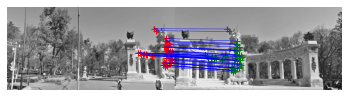

In [293]:
# sift detection 
img1 = "part1_left.jpeg"
img2 = "part1_right.jpeg"
topk = 100
inlier_thres = 16
frame1 = np.asarray(Image.open(img1).convert("L"))
filtered_coords1, dsp1 = sift_descriptor(frame1)
frame2 = np.asarray(Image.open(img2).convert("L"))
filtered_coords2, dsp2 = sift_descriptor(frame2)
# descriptor 
dist = descriptor_distance(dsp1, dsp2, dist="euclidean")
# dist = descriptor_distance(dsp1, dsp2, dist="normal_correlation")
matches = get_matches(dist, topk=topk)
matched_pt1 = [filtered_coords1[i[0]] for i in matches]
matched_pt2 = [filtered_coords2[i[1]] for i in matches]
matched_pt = np.hstack([matched_pt1, matched_pt2])
# ransac
homo_sift, inliers_sift, resi, best_idx = ransac(matched_pt, inlier_thres=inlier_thres, iter=100)
fig, ax = plt.subplots()
# inliers = matched_pt
plot_inlier_matches(ax, frame1, frame2, inliers_sift)


/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in true_divide


(31, 2)
iter: 0
iter: 55
iter: 195


/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/Users/zongfan/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Number of highest inliers:  6
Best residual:  9.421487814369076


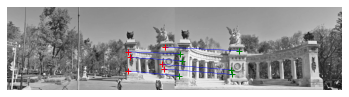

In [296]:
# harris detection 
neighbor_size = 8
neighbor_scale = 1
match_dist = 0.3
inlier_thres = 64
frame1 = np.asarray(Image.open(img1).convert("L"))
harrisim1 = compute_harris_response(frame1)
filtered_coords1 = get_harris_points(harrisim1, min_distance=10, threshold=0.1)
frame2 = np.asarray(Image.open(img2).convert("L"))
harrisim2 = compute_harris_response(frame2)
filtered_coords2 = get_harris_points(harrisim2, min_distance=10, threshold=0.1)
# descriptor 
dsp1 = neighbor_descriptor(frame1, filtered_coords1, neighbor_size=neighbor_size, scale=neighbor_scale)
dsp2 = neighbor_descriptor(frame2, filtered_coords2, neighbor_size=neighbor_size, scale=neighbor_scale)
dsp1 = (dsp1 - np.mean(dsp1)) / np.std(dsp1)
dsp2 = (dsp2 - np.mean(dsp2)) / np.std(dsp2)
dist = descriptor_distance(dsp1, dsp2, dist="euclidean")
dist /= dsp1.shape[1]
matches = get_matches(dist, threshold=match_dist)
print(matches.shape)
matched_pt1 = [filtered_coords1[i[0]] for i in matches]
matched_pt2 = [filtered_coords2[i[1]] for i in matches]
matched_pt = np.hstack([matched_pt1, matched_pt2])
# yxyx to xyxy
matched_pt = matched_pt[:, [1, 0, 3, 2]]
# ransac
homo_harris, inliers_harris, resi, best_idx = ransac(matched_pt, inlier_thres=inlier_thres, iter=10000)
fig, ax = plt.subplots()
# inliers = matched_pt
plot_inlier_matches(ax, frame1, frame2, inliers_harris)


In [172]:
def warp_images(img1, img2, H):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    pts1 = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
    pts2 = np.float32([[0, 0], [0, h2], [w2, h2], [w2, 0]]).reshape(-1, 1, 2)
    pts1_trans = cv2.perspectiveTransform(pts1, H)
    pts = np.concatenate((pts1_trans, pts2), axis=0)
    [xmin, ymin] = np.int32(pts.min(axis=0).ravel() - 0.5)
    [xmax, ymax] = np.int32(pts.max(axis=0).ravel() + 0.5)
    t = [-xmin, -ymin]   
    Ht = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]])
    img1_warp = cv2.warpPerspective(img1, Ht.dot(H), (xmax-xmin, ymax-ymin))

    # if not color:
    img2_warp = np.zeros_like(img1_warp)
    if len(img1.shape) == 2:
        img2_warp[t[1]:t[1]+h2, t[0]:t[0]+w2] = img2
    else:
        img2_warp[t[1]:t[1]+h2, t[0]:t[0]+w2, :] = img2
    img1_warp_idx = img1_warp > 0
    img2_warp_idx = img2_warp > 0
    merge = np.where(img1_warp_idx & img2_warp_idx, img1_warp/2+img2_warp/2, img1_warp+img2_warp)
    merge = merge.astype(np.uint8)
    return merge


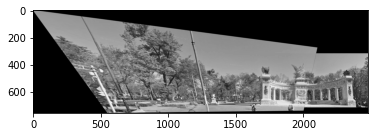

In [297]:
# gray
homo = homo_harris
frame1 = np.asarray(Image.open(img1).convert("L"))
frame2 = np.asarray(Image.open(img2).convert("L"))
merge = warp_images(frame1, frame2, homo)
plt.imshow(merge)

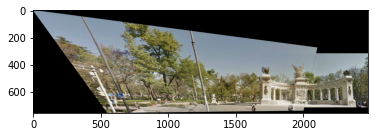

In [298]:
# color
frame1 = np.asarray(Image.open(img1))
frame2 = np.asarray(Image.open(img2))
merge = warp_images(frame1, frame2, homo)
plt.imshow(merge)

In [254]:
# extra 1. multi images
# hill
hill_left_path = "MP3_part1_data/hill/1.JPG"
hill_mid_path = "MP3_part1_data/hill/2.JPG"
hill_right_path ="MP3_part1_data/hill/3.JPG"
# ledge
ledge_left_path = "MP3_part1_data/ledge/1.JPG"
ledge_mid_path = "MP3_part1_data/ledge/2.JPG"
ledge_right_path = "MP3_part1_data/ledge/3.JPG"
# pier
pier_left_path = "MP3_part1_data/pier/1.JPG"
pier_mid_path = "MP3_part1_data/pier/2.JPG"
pier_right_path = "MP3_part1_data/pier/3.JPG"



In [248]:
def warp_3images(img1, img2, img3, color=False):
    topk = 100
    inlier_thres = 16
    frame1 = np.asarray(Image.open(img1).convert("L"))
    filtered_coords1, dsp1 = sift_descriptor(frame1)
    frame2 = np.asarray(Image.open(img2).convert("L"))
    filtered_coords2, dsp2 = sift_descriptor(frame2)
    frame3 = np.asarray(Image.open(img3).convert("L"))
    filtered_coords3, dsp3 = sift_descriptor(frame3)
    # descriptor 
    dist = descriptor_distance(dsp1, dsp2, dist="euclidean")
    # dist = descriptor_distance(dsp1, dsp2, dist="normal_correlation")
    matches = get_matches(dist, topk=topk)
    matched_pt1 = [filtered_coords1[i[0]] for i in matches]
    matched_pt2 = [filtered_coords2[i[1]] for i in matches]
    matched_pt = np.hstack([matched_pt1, matched_pt2])
    # ransac
    if color: 
        frame1 = np.asarray(Image.open(img1))
        frame2 = np.asarray(Image.open(img2))
        frame3 = np.asarray(Image.open(img3)) 
    homo_sift1, inliers_sift, resi, best_idx = ransac(matched_pt, inlier_thres=inlier_thres, iter=100)
    merge = warp_images(frame1, frame2, homo_sift1)

    # merge point
    filtered_coords12, dsp12 = sift_descriptor(merge)
    dist = descriptor_distance(dsp12, dsp3, dist="euclidean")
    # dist = descriptor_distance(dsp1, dsp2, dist="normal_correlation")
    matches = get_matches(dist, topk=topk)
    matched_pt12 = [filtered_coords12[i[0]] for i in matches]
    matched_pt3 = [filtered_coords3[i[1]] for i in matches]
    matched_pt = np.hstack([matched_pt12, matched_pt3])
    # ransac
    homo_sift2, inliers_sift, resi, best_idx = ransac(matched_pt, inlier_thres=inlier_thres, iter=100)
    merge_all = warp_images(merge, frame3, homo_sift2)
    plt.imshow(merge_all)



iter: 0
Number of highest inliers:  100
Best residual:  0.11776875642524048
iter: 0
Number of highest inliers:  100
Best residual:  0.05292571869878942


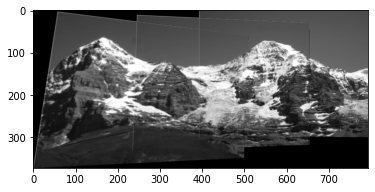

In [249]:
warp_3images(hill_left_path, hill_mid_path, hill_right_path, False)

iter: 0
Number of highest inliers:  100
Best residual:  0.20672922332939062
iter: 0
Number of highest inliers:  100
Best residual:  0.7122187708924063


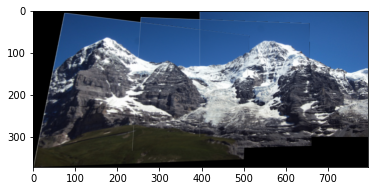

In [250]:
warp_3images(hill_left_path, hill_mid_path, hill_right_path, True)

iter: 0
iter: 1
iter: 2
iter: 5
iter: 7
iter: 13
iter: 15
Number of highest inliers:  100
Best residual:  1.048084971385004
iter: 0
iter: 1
iter: 2
Number of highest inliers:  100
Best residual:  1.667801716592384


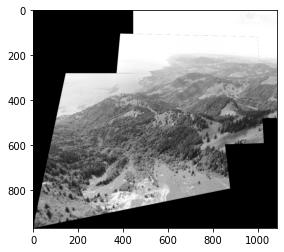

In [251]:
warp_3images(ledge_left_path, ledge_mid_path, ledge_right_path, False)

iter: 0
Number of highest inliers:  100
Best residual:  0.9887529701596365
iter: 0
iter: 2
iter: 4
Number of highest inliers:  100
Best residual:  1.735446135510064


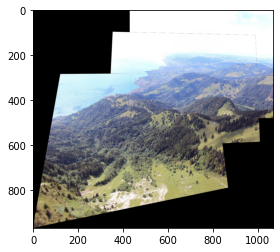

In [252]:
warp_3images(ledge_left_path, ledge_mid_path, ledge_right_path, True)

iter: 0
Number of highest inliers:  100
Best residual:  1.225692835855793
iter: 0
Number of highest inliers:  100
Best residual:  0.07692052134591143


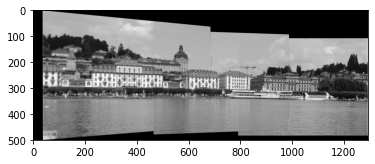

In [255]:
warp_3images(pier_left_path, pier_mid_path, pier_right_path, False)

iter: 0
Number of highest inliers:  100
Best residual:  0.0524469024457072
iter: 0
iter: 1
iter: 2
iter: 3
iter: 4
Number of highest inliers:  100
Best residual:  0.02051010676832013


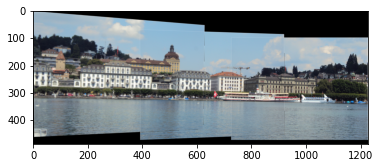

In [257]:
warp_3images(pier_left_path, pier_mid_path, pier_right_path, True)

iter: 0
iter: 1
iter: 3
Number of highest inliers:  25
Best residual:  9.554676998710864


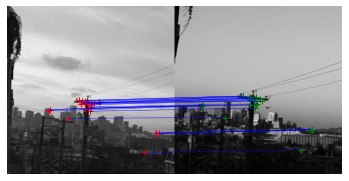

In [300]:
# extra 2. difficult pairs
img1 = "sunset1.jpeg"
img2 = "sunset2.jpeg"
topk = 100
inlier_thres = 80
frame1 = np.asarray(Image.open(img1).convert("L"))
filtered_coords1, dsp1 = sift_descriptor(frame1)
frame2 = np.asarray(Image.open(img2).convert("L"))
filtered_coords2, dsp2 = sift_descriptor(frame2)
# filter out kp at edge
fil1_idx = filtered_coords1[:, 0] > 0.15*frame1.shape[1]
filtered_coords1 = filtered_coords1[fil1_idx]
dsp1 = dsp1[fil1_idx]
fil2_idx = filtered_coords2[:, 0] > 0.15*frame2.shape[1]
filtered_coords2 = filtered_coords2[fil2_idx]
dsp2 = dsp2[fil2_idx]
# descriptor 
dist = descriptor_distance(dsp1, dsp2, dist="euclidean")
# dist = descriptor_distance(dsp1, dsp2, dist="normal_correlation")
matches = get_matches(dist, topk=topk)
matched_pt1 = [filtered_coords1[i[0]] for i in matches]
matched_pt2 = [filtered_coords2[i[1]] for i in matches]
matched_pt = np.hstack([matched_pt1, matched_pt2])
# ransac
homo_sift, inliers_sift, resi, best_idx = ransac(matched_pt, inlier_thres=inlier_thres, iter=100)
fig, ax = plt.subplots()
# inliers = matched_pt
plot_inlier_matches(ax, frame1, frame2, inliers_sift)

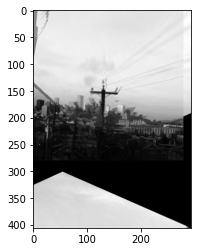

In [289]:
# gray
homo = homo_sift
frame1 = np.asarray(Image.open(img1).convert("L"))
frame2 = np.asarray(Image.open(img2).convert("L"))
merge = warp_images(frame1, frame2, homo)
plt.imshow(merge)

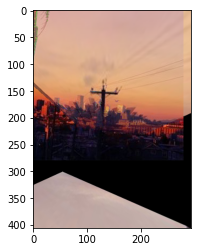

In [290]:
# gray
homo = homo_sift
frame1 = np.asarray(Image.open(img1))
frame2 = np.asarray(Image.open(img2))
merge = warp_images(frame1, frame2, homo)
plt.imshow(merge)